Considere una curva gaussiana con media 0 y varianza 1. Aproxime esta curva con una spline cúbica usando 5 puntos entre x=0 y x=2. Use esta spline para calcular la integral de la función. Compare el resultado con su valor exacto (ver la función de error de tareas anteriores).

In [1]:
#Importamos librerías
import matplotlib.pyplot as plt #para graficar
from scipy.interpolate import interp1d #para interpolar
import numpy as np

In [48]:
def gauss(x,mu,sigma):
    '''Define una gaussiana
    x = puntos
    mu = media
    sigma = varianza
    '''
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

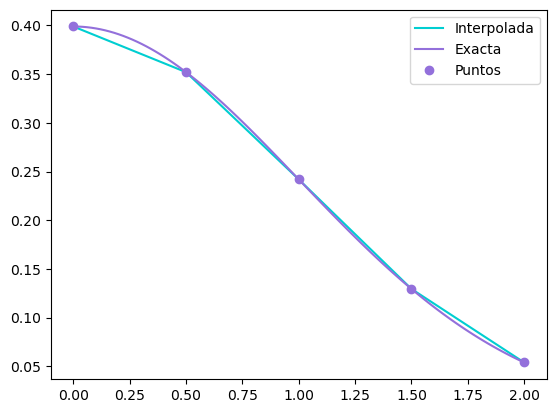

In [49]:
x = np.linspace(0, 2, num=100, endpoint=True) #Arreglo desde 0 a 2 puntos
y = gauss(x,0,1) #evaluamos la función con cada punto 

#Utilizamos el paquete de scipy para realizar interpolación cúbica
f = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 2, num=5, endpoint=True)#Elegimos el orden 5

#Graficamos ambas curvas

plt.plot(xnew, gauss(xnew,0,1),color= 'darkturquoise') #aproximación
plt.plot(x, y,xnew,f(xnew),'o',color= 'mediumpurple') #exacta junto con los puntos
plt.legend(['Interpolada','Exacta','Puntos'])
plt.show()

In [55]:
#Importamos para calcular integrales
from scipy.integrate import quad
#Calculamos integrales
integral_inter = quad(f, 0, 2) #interpolada
integral_inter

(0.47724986804009223, 6.529605474097861e-12)

In [53]:
#Calculamos la función error (la mitad, ya que solo necesitamos de 0 a 2)
import math
x = math.erf(2)/2
x

0.49766113250947636

In [47]:
#Primero convierto a float el primer elemento de integral_inter ya que es una tupla
float=integral_inter[0]

#Error absoluto
err = abs(float-x)
print('El error absoluto entre ambas funciones es de =', err)

El error absoluto entre ambas funciones es de = 0.020411264469384127


# Calificacion: 7.0